In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('winequality.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [10]:
df.shape

(1599, 12)

<AxesSubplot:>

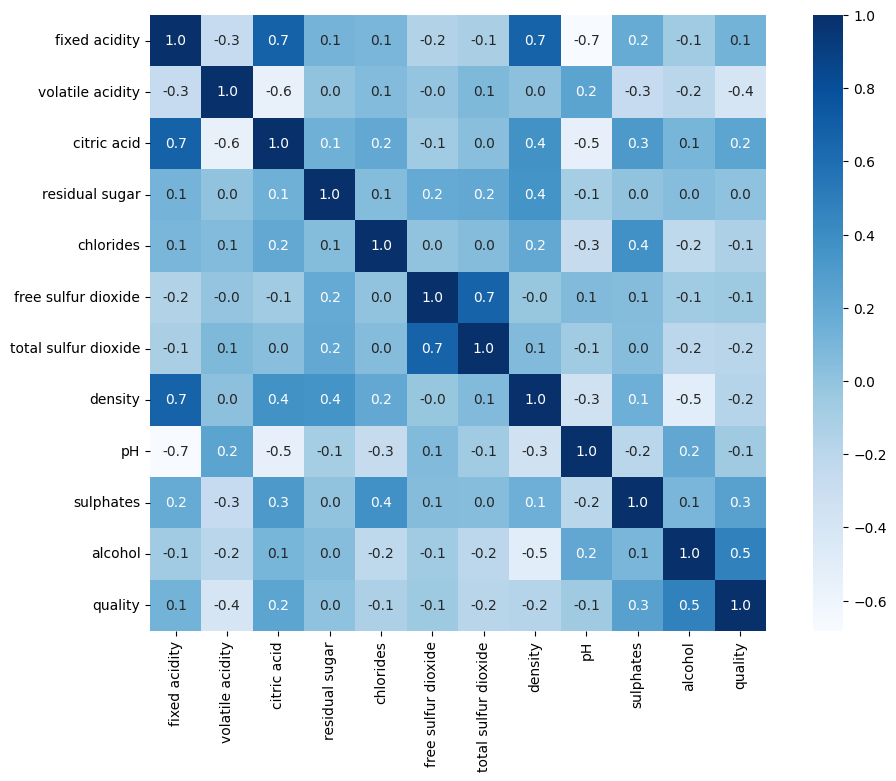

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cbar=True, square=True, fmt='.1f',
           annot=True,cmap='Blues')

In [14]:
#data analysis and visualiation
#stastical measures
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


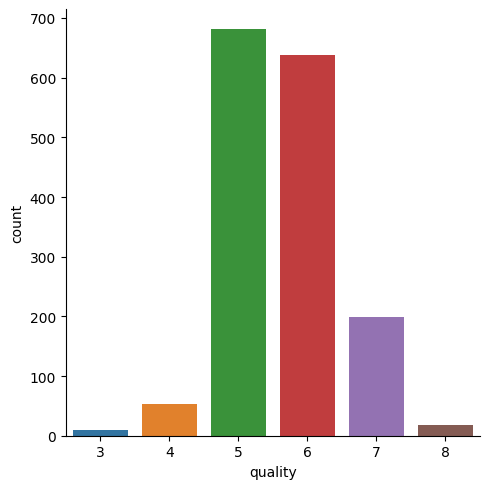

In [15]:
#number of values for each quality
sns.catplot(x='quality',data=df,kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

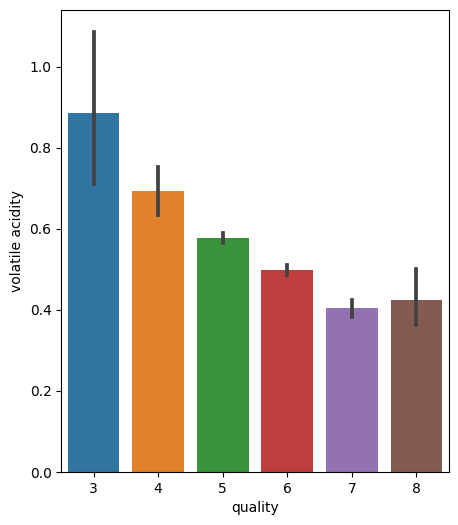

In [16]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,6))
sns.barplot(x='quality',y='volatile acidity',data=df)


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

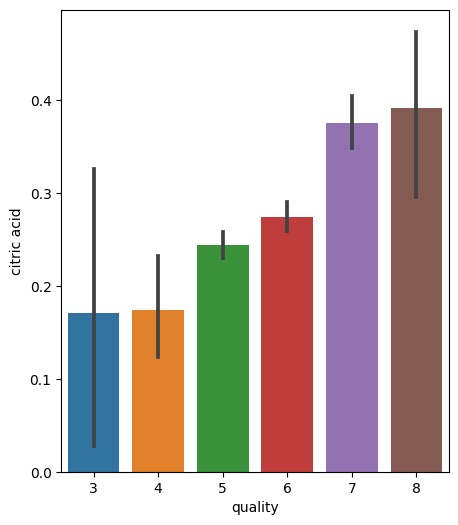

In [18]:
plot=plt.figure(figsize=(5,6))
sns.barplot(x='quality',y='citric acid',data=df)



In [29]:
df.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

In [35]:
#data pre-processing
#seperating the data and the label
x=df.drop('quality',axis=1)

In [31]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [36]:
#label binarization
y=df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [37]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [39]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [40]:
print(x.shape,x_train.shape,x_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [44]:
rf=RandomForestClassifier()

In [45]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
x_train_pred=rf.predict(x_train)

In [48]:
x_train_accuracy=accuracy_score(x_train_pred,y_train)
print(x_train_accuracy)

1.0


In [49]:
x_test_pred=rf.predict(x_test)

In [50]:
x_test_accuracy=accuracy_score(x_test_pred,y_test)
print(x_test_accuracy)

0.928125


# building a predictive system

In [53]:
input_data=(6.7,0.58,0.08,1.8,0.09699999999999999,
            15.0,65.0,0.9959,3.28,0.54,9.2)

#changing the input data to numpy array
numpy_array=np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_array_reshape=numpy_array.reshape(1,-1)

pred=rf.predict(input_array_reshape)
print(pred)

if pred[0]==1:
    print('The quality of wine is good')
else:
    print('The quality of wine is bad')


[0]
The quality of wine is bad


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
new_data=df

In [56]:
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
new_data.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler=StandardScaler()

In [64]:
sulfur_dioxide=np.asarray(new_data['total sulfur dioxide'])

In [65]:
print(sulfur_dioxide)

[34. 67. 54. ... 40. 44. 42.]


In [66]:
sulfur_dioxide_reshape=sulfur_dioxide.reshape(1,-1)

In [67]:
scaler.fit(sulfur_dioxide_reshape)

StandardScaler()

In [69]:
stand_data=scaler.transform(sulfur_dioxide_reshape)

In [70]:
print(stand_data)

[[0. 0. 0. ... 0. 0. 0.]]


In [71]:
print(stand_data.std())

0.0


In [75]:
list_data=list(stand_data)

In [76]:
print(list_data)

[array([0., 0., 0., ..., 0., 0., 0.])]


In [77]:
new_data['total sulfur doxide']=list_data

ValueError: Length of values (1) does not match length of index (1599)

In [79]:
len(list_data)

1

In [81]:
x1=new_data.drop('quality',axis=1)
y1=new_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [84]:
scaler1=StandardScaler()

In [85]:
scaler1.fit(x1)

StandardScaler()

In [86]:
stand_data1=scaler1.transform(x1)

In [87]:
print(stand_data1)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [88]:
print(stand_data1.std())

1.0


In [91]:
x1=stand_data1
y1=new_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [92]:
x1.shape

(1599, 11)

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,stratify=y1,random_state=2)

In [95]:
print(x1.shape,x_train.shape,x_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [96]:
model=RandomForestClassifier()

In [97]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
train_pred=model.predict(x_train)
train_pred_acc=accuracy_score(train_pred,y_train)
print(train_pred_acc)

1.0


In [101]:
test_pred=model.predict(x_test)
test_pred_acc=accuracy_score(test_pred,y_test)
print(test_pred_acc)

0.94375


In [103]:
input_data=(6.7,0.58,0.08,1.8,0.09699999999999999,
            15.0,65.0,0.9959,3.28,0.54,9.2)
arr=np.asarray(input_data)

arr_reshape=arr.reshape(1,-1)

pred1=model.predict(arr_reshape)
print(pred1)



[0]
